In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# PRE-PROCESSING

In [5]:
df=data.copy()

In [6]:
# featur ingenering

# Extraire le groupe à partir de PassengerId
df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0])

# Calculer la taille du groupe pour chaque passager
df['GroupSize'] = df.groupby('Group')['PassengerId'].transform('count')

# Créer une colonne indiquant si le passager est seul ou non
df['IsAlone'] = (df['GroupSize'] == 1).astype(int)


In [7]:
df=df.drop(['PassengerId','Name','Group','GroupSize'],axis=1)

In [8]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,IsAlone
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1


In [9]:
list_col=list(df.columns)
list_col.remove('IsAlone')
list_col.insert(0,'IsAlone')

In [10]:
df=df[list_col]
df.head()

,IsAlone,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [11]:
df.shape

(8693, 13)

In [12]:
nan_count = df.isnull().sum()
nan_count

,0
IsAlone,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


## Encodage

In [13]:
import numpy as np

def clean_dataframe(df):
    # Remplacer les valeurs infinies par NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Remplacer les NaN par la moyenne de la colonne
#     df.fillna(df.mean(), inplace=True)
    df = df.dropna(axis=0)

    return df


In [14]:
import pandas as pd

def apply_one_hot_encoding(df):
    # Appliquer l'encodage one-hot pour les colonnes de type 'object' (catégoriques)
    df_encoded = pd.get_dummies(df, drop_first=True)
    return df_encoded


In [15]:
def convert_booleans_to_integers(df):
    # Rechercher les colonnes de type booléen et les convertir en 1/0
    bool_columns = df.select_dtypes(include=['bool']).columns
    df[bool_columns] = df[bool_columns].astype(int)
    return df


In [16]:
from sklearn.preprocessing import MinMaxScaler

def apply_normalization(df):
    # Identifier les colonnes numériques (int et float)
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Appliquer la normalisation MinMaxScaler
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    return df


In [17]:
# Étape 1 : Nettoyer les NaN et valeurs infinies
df_cleaned = clean_dataframe(df)

# Étape 2 : Appliquer l'encodage one-hot
df_encoded = apply_one_hot_encoding(df_cleaned)

# Étape 3 : Convertir les booléens en 1/0
df_converted = convert_booleans_to_integers(df_encoded)

# Étape 4 : Appliquer la normalisation
df_normalized = apply_normalization(df_converted)

# df_normalized est maintenant le dataframe final traité
df_normalized.head()


,IsAlone,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_G/996/S,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/3/P,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1.0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.303797,0.010988,0.000302,0.001064,0.024500,0.002164,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.417722,0.000000,0.043035,0.015793,0.148563,0.009491,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.202532,0.030544,0.002348,0.006428,0.025214,0.000098,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df=df_normalized
df.head()

,IsAlone,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_G/996/S,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/3/P,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1.0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.303797,0.010988,0.000302,0.001064,0.024500,0.002164,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.417722,0.000000,0.043035,0.015793,0.148563,0.009491,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.202532,0.030544,0.002348,0.006428,0.025214,0.000098,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
df.shape

(6764, 5426)

## TrainTest - Nettoyage - Encodage

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
trainset, testset = train_test_split(df,test_size=0.2,random_state=0)

In [22]:
trainset['Transported'].value_counts()

,count
Transported,
1.0,2718
0.0,2693


In [23]:
testset['Transported'].value_counts()

,count
Transported,
1.0,683
0.0,670


In [24]:
def x_y(df):
    x=df.drop(['Transported'],axis=1)
    y=df['Transported']
    return x,y


In [36]:
X_train,y_train=x_y(trainset)
X_test,y_test=x_y(testset)

In [42]:
y_train.shape

(5411,)

In [43]:
X_test.shape

(1353, 5425)

In [38]:
trainset.shape

(5411, 5426)

# Procédure d'évaluation

In [30]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report ,accuracy_score
from sklearn.model_selection import learning_curve

In [31]:
def evaluation(model):

    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Prédictions
    ypred = model.predict(X_test)

    # Affichage de la matrice de confusion
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, ypred))

    # Affichage du rapport de classification (précision, rappel, F1-score)
    print("\nClassification Report:")
    print(classification_report(y_test, ypred))

    # Affichage de l'accuracy
    accuracy = accuracy_score(y_test, ypred)
    print("\nAccuracy:")
    print(accuracy)

    # Courbes d'apprentissage
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='Train Score')
    plt.plot(N, val_score.mean(axis=1), label='Validation Score')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score')
    plt.legend()
    plt.show()


Confusion Matrix:
[[539 131]
 [123 560]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       670
         1.0       0.81      0.82      0.82       683

    accuracy                           0.81      1353
   macro avg       0.81      0.81      0.81      1353
weighted avg       0.81      0.81      0.81      1353


Accuracy:
0.8122690317812269


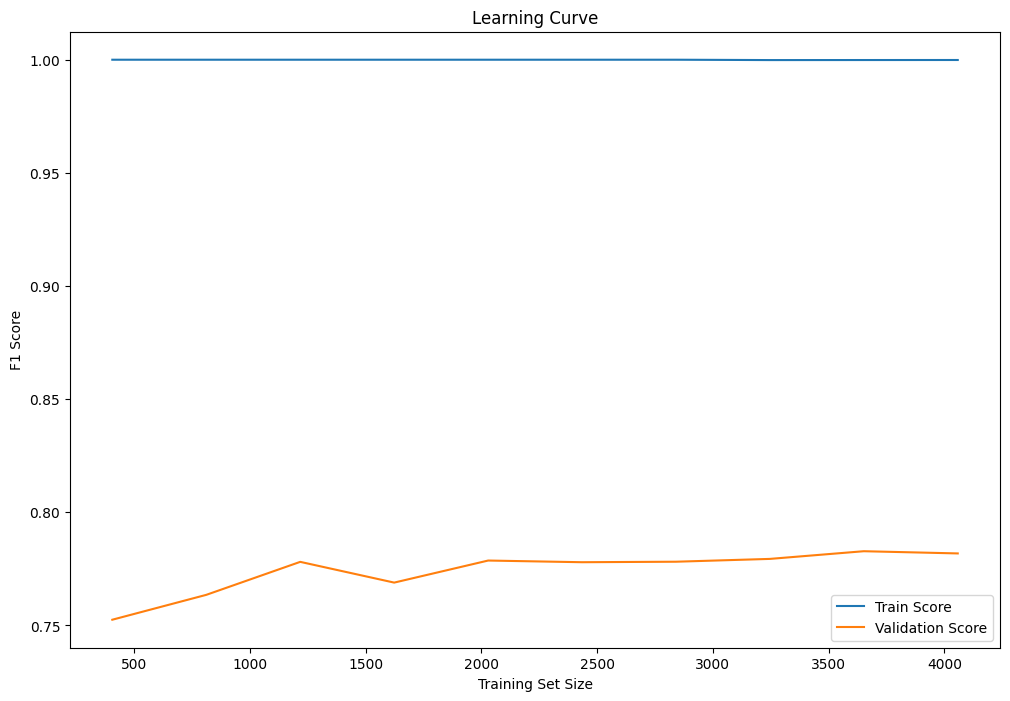

In [39]:
evaluation(model_1)

In [ ]:
df.to_csv('data/train_prp.csv',index=False)

In [ ]:
df

,IsAlone,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_G/996/S,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/3/P,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1.0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,0.303797,0.010988,0.000302,0.001064,0.024500,0.002164,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0.0,0.417722,0.000000,0.043035,0.015793,0.148563,0.009491,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,0.202532,0.030544,0.002348,0.006428,0.025214,0.000098,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1.0,0.556962,0.000000,0.016201,0.000000,0.012986,0.000000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.0,0.329114,0.004234,0.051622,0.000128,0.000000,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1.0,0.443038,0.000000,0.026331,0.000724,0.009639,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0.0,0.177215,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11,0.0,0.569620,0.003931,0.244692,0.025072,0.004909,0.006098,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Modellisation

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA


In [33]:
model_1 = RandomForestClassifier(random_state=0)

In [34]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler

# model_3 = make_pipeline(PolynomialFeatures(),StandardScaler(),SGDClassifier(random_state=0))

# param ={'polynomialfeatures__degree':[2,3,4],
#        'sgdclassifier__penalty':['l1','l2']}

# grid = GridSearchCV(model_3,param_grid=param,cv=4)

# grid.fit(X_train,Y_train)

# Resaux de neurones

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    # Input layer with Batch Normalization for high-dimensional data
    Dense(256, input_shape=(5425,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden layer 1
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=30, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │       1,389,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,432,065 (5.46 MB)

 Trainable params: 1,431,169 (5.46 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6265 - loss: 0.7374 - val_accuracy: 0.6948 - val_loss: 0.6690
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.7760 - loss: 0.4614 - val_accuracy: 0.6874 - val_loss: 0.5959
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.8957 - loss: 0.2675 - val_accuracy: 0.7398 - val_loss: 0.5046
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9501 - loss: 0.1452 - val_accuracy: 0.7761 - val_loss: 0.5197
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9638 - loss: 0.1044 - val_accuracy: 0.7672 - val_loss: 0.5849
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9678 - loss: 0.0912 - val_accuracy: 0.7450 - val_loss: 0.7155
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9679 - loss: 0.0870 - val_accuracy: 0.7494 - val_loss: 0.6798
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9717 - loss: 0.0763 - val_accu